[[0.]
 [0.]]
[[ 5.47309550e-10]
 [-3.71515363e-17]]


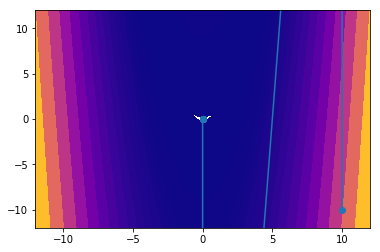

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

a = 0
b = 20
f = lambda x,y: (a - x)**2 + b * (y - x**2)**2

dx = lambda x,y: 2*x*(40*x**2-40*y+1)
dy = lambda x,y: -40*(x**2-y)

dxdx = lambda x,y: -80 * (y-x**2) + 160 * x**2 + 2
dxdy = lambda x,y: -80 * x
dydx = lambda x,y: -80 * x
dydy = lambda x,y: 40
    
f_grad = lambda x,y: np.array([dx(x,y),dy(x,y)]).reshape(-1,1)
f_hess = lambda x,y: np.matrix([[dxdx(x,y),dxdy(x,y)],[dydx(x,y),dydy(x,y)]])

def vanilla(x0, y0, eta = 0.0001, it=100000):
    w = np.empty((it+1,2,1))
    w[0] = np.array([x0,y0]).reshape(-1,1)
    for i in range(it):
        g = f_grad(w[i,0,0],w[i,1,0])
        w[i+1] = w[i] - eta * g
    return w

def newton(x0, y0, it=10):
    w = np.empty((it+1,2,1))
    w[0] = np.array([x0,y0]).reshape(-1,1)
    for i in range(it):
        H = f_hess(w[i,0,0],w[i,1,0])
        g = f_grad(w[i,0,0],w[i,1,0])
        w[i+1] = w[i] - H.I * g
    return w

w0 = [10,-10]        

W_newton = newton(w0[0],w0[1])
print(W_newton[-1])
W_vanilla = vanilla(w0[0],w0[1], it=10000)
print(W_vanilla[-1])

lim = (-12,12)
plt.xlim(lim)
plt.ylim(lim)

y = np.linspace(lim[0],lim[1],100)
X, Y = np.meshgrid(y, y)
Z = f(X,Y)

plt.contourf(X, Y, Z, levels=np.logspace(0,1,40,base=np.max(Z)), cmap='plasma')
plt.scatter(W_newton[:,0],W_newton[:,1])    
plt.plot(W_newton[:,0],W_newton[:,1])    